Height: 6, Aspect: 2


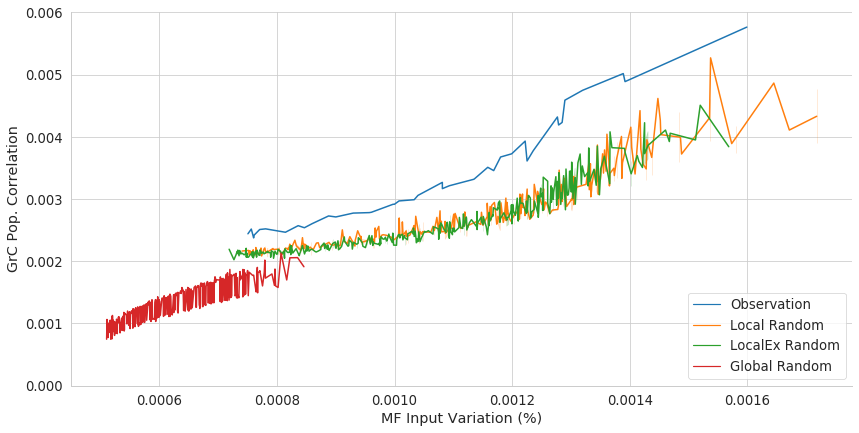

In [3]:
import random
import copy
import logging
import sys

from run_tests_201204 import *

import os
import sys
import importlib
from collections import defaultdict
sys.path.insert(0, '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc')
from tools_pattern import get_eucledean_dist
import compress_pickle
import my_plot
from my_plot import MyPlotData, my_box_plot

# script_n = os.path.basename(__file__).split('.')[0]
script_n = 'plot_grccorr_by_mfcorr_by_actlv_210119'
show = True

base_path = '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/dimensionality_sim'

db = {}
# db = compress_pickle.load(f'{base_path}/data/batch_similarity_by_activation_level_201210_4096.gz')
# db = db[0]

# name = 'batch_similarity_by_activation_level_210118_data_4096_1'
# dbb = compress_pickle.load(f'{base_path}/data/{name}.gz')
# db['data'] = dbb

# name = 'batch_similarity_by_activation_level_210118_naive_random2_4096_10'
# # name = 'batch_similarity_by_activation_level_210118_naive_random2_4096_'
# dbb = compress_pickle.load(f'{base_path}/data/{name}.gz')
# db['naive_random2'] = dbb

# name = 'batch_similarity_by_activation_level_210118_naive_random3_4096_10'
# # name = 'batch_similarity_by_activation_level_210118_naive_random2_4096_'
# dbb = compress_pickle.load(f'{base_path}/data/{name}.gz')
# db['naive_random3'] = dbb

# name = 'batch_similarity_by_activation_level_210118_expanded_random_30_4096_10'
# dbb = compress_pickle.load(f'{base_path}/data/{name}.gz')
# db['expanded_random_30'] = dbb

# name = 'batch_similarity_by_activation_level_210118_global_random_4096_10'
# dbb = compress_pickle.load(f'{base_path}/data/{name}.gz')
# db['global_random'] = dbb


for model_name in [
#         'naive_random2',
#         'naive_random3',
#         'naive_random_15_1',
        'naive_random_15_2',
#         'naive_random_15_3',
#         'naive_random_15_4',
#         'naive_random_17_2',
#         'naive_random_17_3',
        'expanded_random_30',
#         'expanded_random_50',
        'data',
        'global_random',
#         'classic_random',
        ]:
    name = f'batch_similarity_by_activation_level_210118_{model_name}_4096_10'
    dbb = compress_pickle.load(f'{base_path}/data/{name}.gz')
    db[model_name] = dbb


def get_plot_name(model_name):
    if 'data' == model_name:
        return 'Observation'
    if 'classic_random' == model_name:
        return 'Classic Random'
    if 'naive_random_15_2' == model_name:
        return 'Local Random'
    if 'data' == model_name:
        return 'Data'
    if 'expanded_random_30' == model_name:
        return 'LocalEx Random'
    if 'global_random' == model_name:
        return 'Global Random'
    return model_name


def add_results(res, mpd):
    hamming_distance_norm = res['hamming_distance']/res['num_grcs']
    mpd.add_data_point(
        model=get_plot_name(model_name),
        # mf_dim=res[0]['mf_dim'],
        activation_level=activation_level,
        noise_level=noise_level*100,
        grc_dim=res['grc_dim'],
        pct_grc=res['pct_grc']/100,
        pct_mfs=res['pct_mfs']/100,
        # pct_mf_dim=res['pct_mf_dim']/100,
        num_grcs=res['num_grcs'],
        num_mfs=res['num_mfs'],
        voi=res['voi'],
        grc_pop_corr=res['grc_pop_corr'],
        mf_pop_corr=res['mf_pop_corr'],
        binary_similarity=res['binary_similarity'],
        hamming_distance=res['hamming_distance'],
        hamming_distance_norm=hamming_distance_norm,
        # hamming_distance_norm_max=hamming_distance_norm_max,
        )

os.makedirs(script_n, exist_ok=True)

for activation_level in db['data'][0][0]:
    mpd = MyPlotData()
    for model_name in [
            'data',
#             'naive_random2',
#             'naive_random3',
#             'classic_random',
        'naive_random_15_2',
            'expanded_random_30',
#             'expanded_random_50',
            'global_random',
#         'naive_random2',
#         'naive_random3',
#         'naive_random_15_1',
#         'naive_random_15_3',
#         'naive_random_15_4',
#         'naive_random_17_2',
#         'naive_random_17_3',
            ]:
        resss = db[model_name]
        resss_tries = resss[0]
        for resss in resss_tries:
            ress = resss[activation_level]
            for noise_level, res in ress.items():
                add_results(res, mpd)

    if activation_level <= .20:
        show = True
    else:
        show = False
    importlib.reload(my_plot); my_plot.my_relplot(
        mpd,
        x='mf_pop_corr',
        y='grc_pop_corr',
        hue='model',
        context='paper',
        height=6,
        aspect=2,
        ylim=[0, None],
        custom_legend_loc='lower right',
        y_axis_label='GrC Pop. Correlation',
        x_axis_label='MF Input Variation (%)',
        save_filename=f'{script_n}/{script_n}_{activation_level*100}.svg',
        show=show,
        )


In [16]:
resss

[{0.2: {0.025: {'voi': 0.18587842681562594,
    'binary_similarity': 0.9685210622710653,
    'hamming_distance': 16.025390625,
    'normalized_mse': 0.04135371238903798,
    'grc_pop_corr': 0.004472151148867661,
    'mf_dim': 340.9736047598767,
    'mf_pop_corr': 0.0015421010361735422,
    'grc_dim': 237.911465205039,
    'pct_grc': 19.6,
    'pct_mfs': 52.5,
    'num_grcs': 1211,
    'num_mfs': 453},
   0.05: {'voi': 0.32474682436441354,
    'binary_similarity': 0.9372504936469729,
    'hamming_distance': 31.64404296875,
    'normalized_mse': 0.0816578317731988,
    'grc_pop_corr': 0.004473165814028975,
    'mf_dim': 342.5899443501176,
    'mf_pop_corr': 0.0014787220670789785,
    'grc_dim': 238.85269462017493,
    'pct_grc': 19.7,
    'pct_mfs': 52.7,
    'num_grcs': 1211,
    'num_mfs': 453},
   0.075: {'voi': 0.44220756716889814,
    'binary_similarity': 0.907493954613091,
    'hamming_distance': 47.082763671875,
    'normalized_mse': 0.1214976354043017,
    'grc_pop_corr': 0.00409